# Captcha Recognition With K-Nearest-Neighbours

Import required libraries

In [44]:
import numpy as np                  # used for creating numpy arrays for model creation
import cv2                          # used for image processing
import os                           # used to read files and directory structure

Define global variables

In [45]:
RESIZED_IMAGE_WIDTH = 20                    # width of resized image
RESIZED_IMAGE_HEIGHT = 30                   # height of resized image

DATASET_PATH = os.getcwd() + '/dataset/'    # Dataset path

## TRAIN MODEL

### Load Dataset

Open training characters image

In [46]:
X = []              # flattened images
y = []              # labels

In [47]:
for char in os.listdir(DATASET_PATH):               # for each character folder
    # print(char)                                     # print the character name
    if (len(char) > 1):                             # if the folder name is more than 1 character, skip it
        continue
    for img in os.listdir(DATASET_PATH + char):     # for each image in the folder
        if img[-3:] != 'png':                       # if the image is not a png file, skip it
            continue
        # read the image
        image = cv2.imread(DATASET_PATH + char + '/' + img, cv2.IMREAD_GRAYSCALE)
        # flatten the image
        flattenedImage = image.reshape(RESIZED_IMAGE_WIDTH * RESIZED_IMAGE_HEIGHT)
        X.append(flattenedImage)                    # append the image to the X array
        y.append(ord(char))                         # append the class number to the y array

In [48]:
# convert to numpy arrays
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

In [49]:
print(X.shape)
print(y.shape)

(10000, 600)
(10000,)


Normalize The Data

In [50]:
X /= 255.0

Plot Dataset

In [51]:
import seaborn as sns                   # used for plotting graphs
import matplotlib.pyplot as plt         # used for plotting graphs

In [52]:
# count the number of times each class occurs
plot = np.unique(y, return_counts=True)

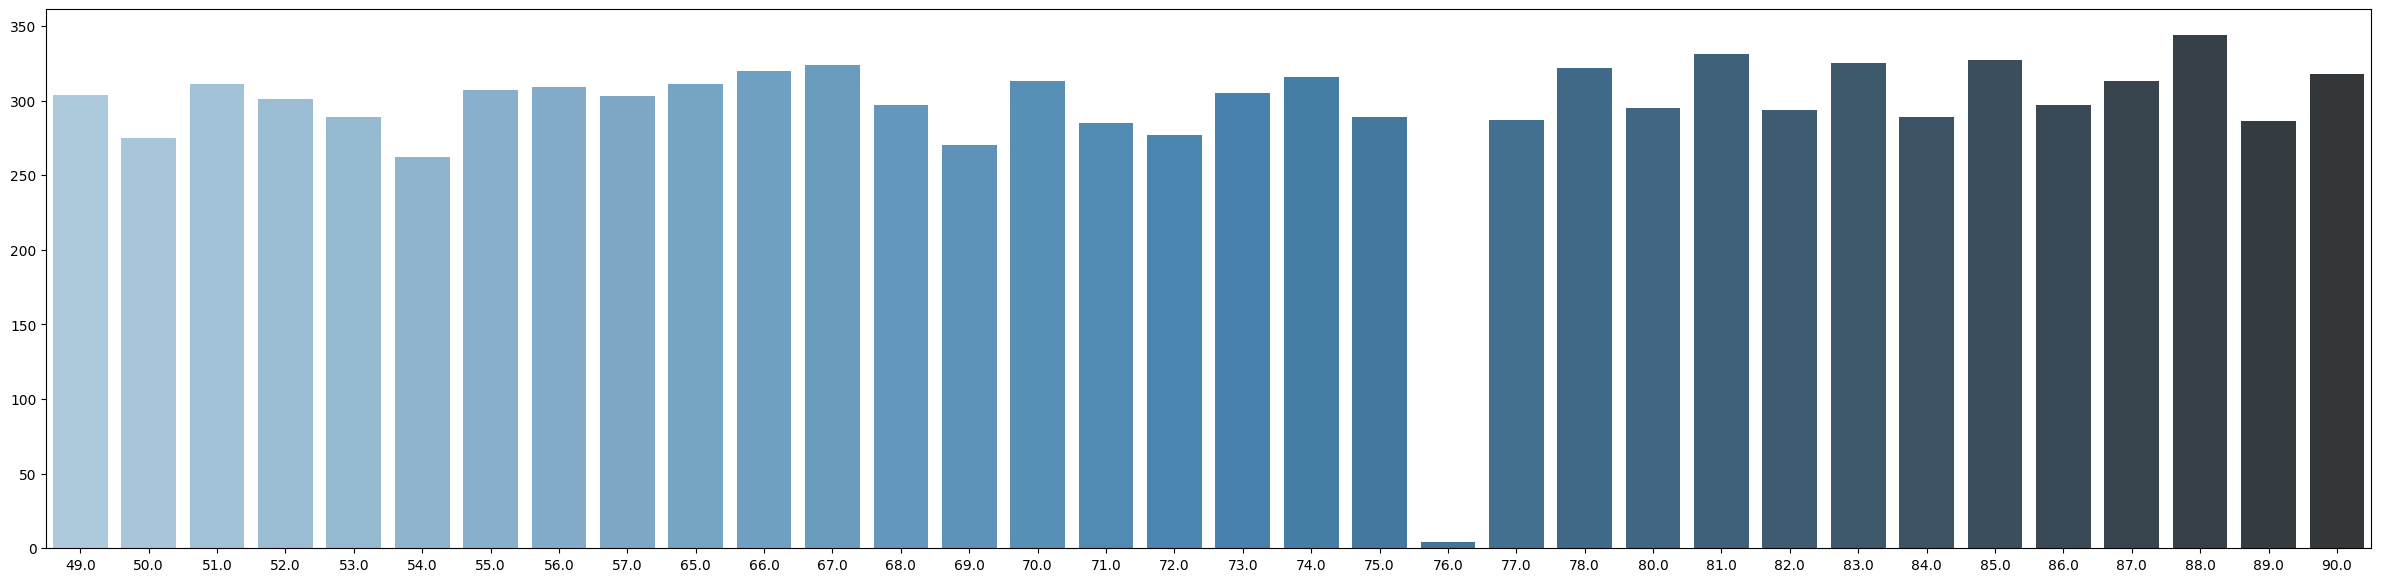

In [53]:
plt.figure(figsize = (30, 7))                                       # set the size of the plot
sns.barplot(x = plot[0], y = plot[1], palette='Blues_d')            # plot the graph
plt.show()                                                          # show the graph

### Split dataset in training and testing data

Import Libraries

In [54]:
from sklearn.neighbors import KNeighborsClassifier       # KNN classifier
from sklearn.model_selection import train_test_split     # used for splitting the dataset into training and testing sets
from sklearn.metrics import classification_report        # used for evaluating the model

Split Dataset

In [161]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

Plot Training Data

In [162]:
# count the number of times each class occurs in training set
plot_train = np.unique(y_train, return_counts=True)

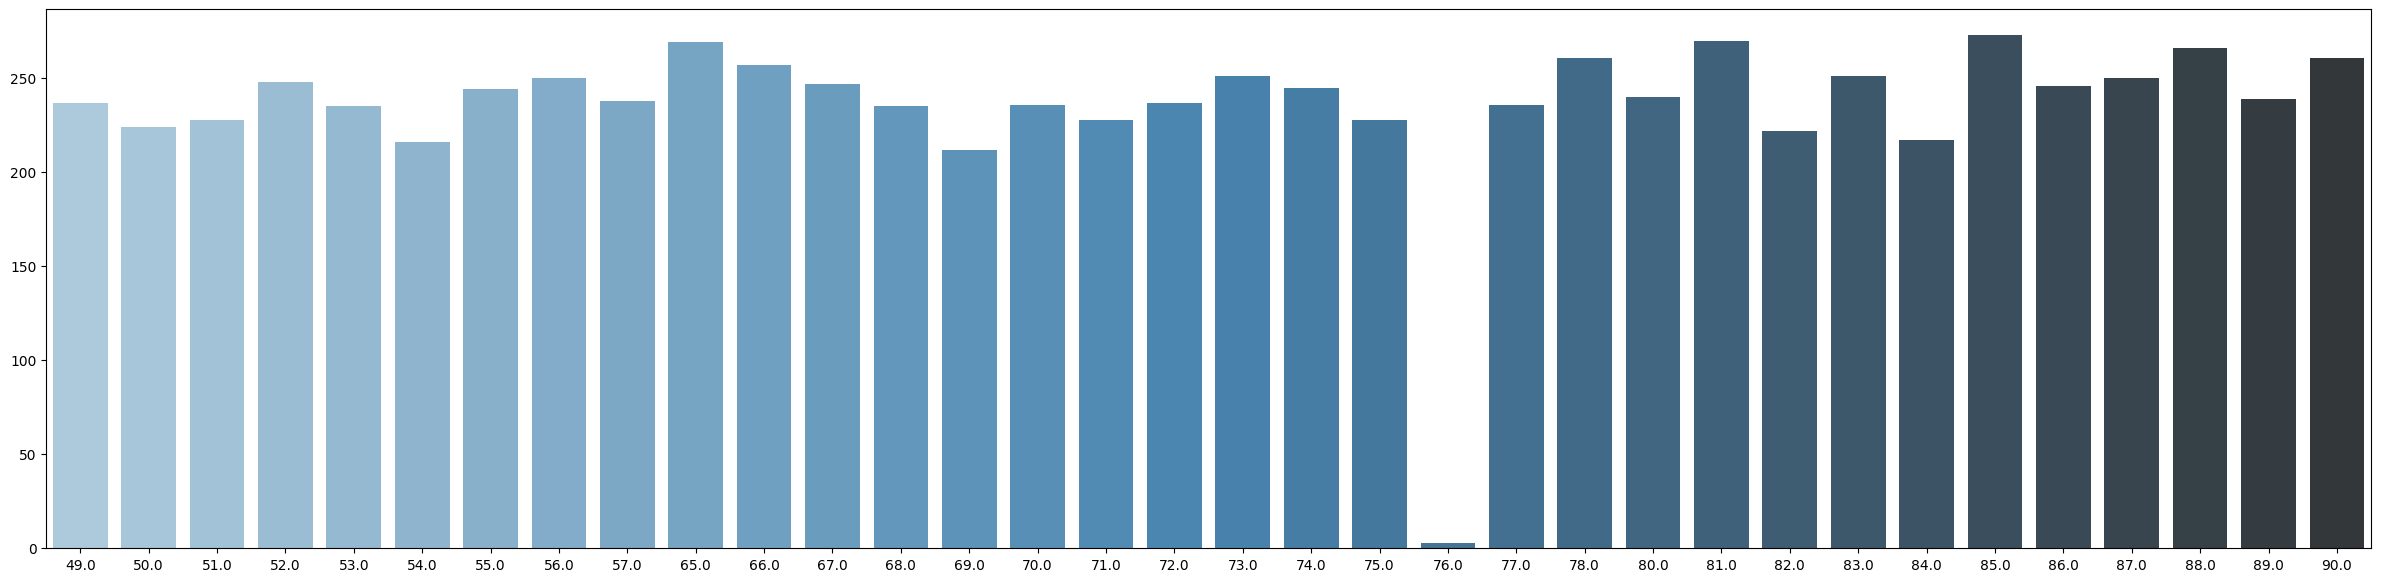

In [163]:
plt.figure(figsize = (30, 7))                                           # set the size of the plot
sns.barplot(x = plot_train[0], y = plot_train[1], palette='Blues_d')    # plot the graph
plt.show()                                                              # show the graph

Plot Testing Data

In [164]:
# count the number of times each class occurs in testing set
plot_test = np.unique(y_test, return_counts=True)

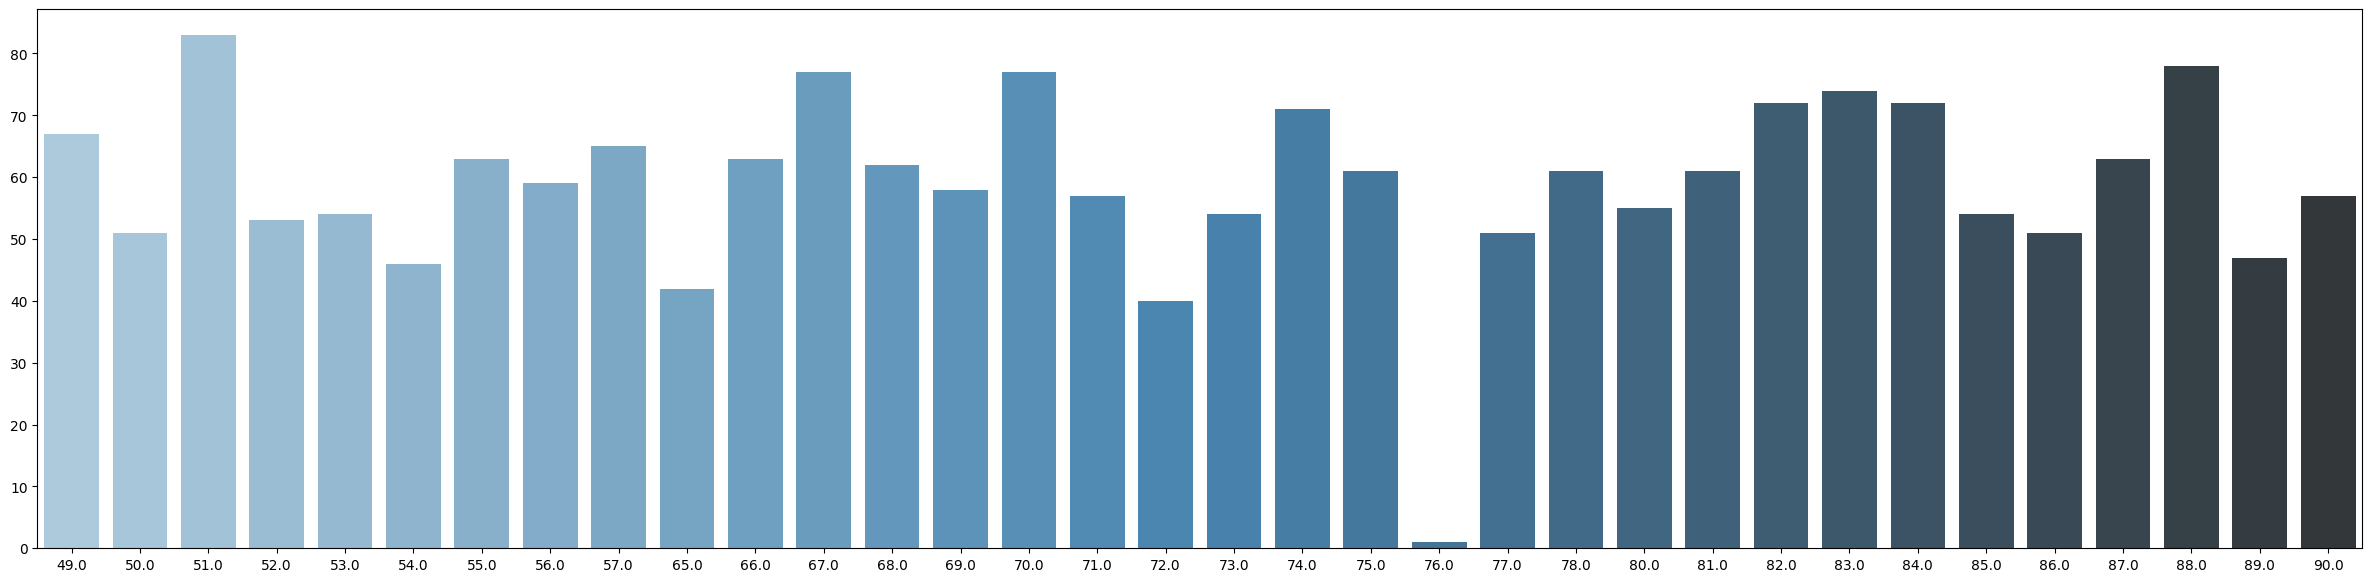

In [165]:
plt.figure(figsize = (30, 7))                                           # set the size of the plot
sns.barplot(x = plot_test[0], y = plot_test[1], palette = 'Blues_d')    # plot the graph
plt.show()                                                              # show the graph

### Create K-Nearest-Neighbours Model

Create KNN object

In [186]:
kNearest = KNeighborsClassifier(n_neighbors = 3)    # create the KNN classifier, distance metric is minkowski, p = 2
kNearest.fit(X_train, y_train)                      # train the model

KNeighborsClassifier(n_neighbors=3)

In [194]:
# do k fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kFold = KFold(n_splits = 10, random_state = 45, shuffle=True)         # create the k fold object

# get the scores for each fold
scores = cross_val_score(kNearest, X_train, y_train, cv = kFold, scoring = 'accuracy')

# print the scores
print(scores.max())

# print the classification report
print(classification_report(y_test, kNearest.predict(X_test)))

# print the accuracy of the model
print(kNearest.score(X_test, y_test))

[0.91125 0.92375 0.9075  0.92375 0.935   0.905   0.91875 0.92    0.9225
 0.92875]


/Users/rohit/.local/share/virtualenvs/OCR-XFjxz9Cn/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rohit/.local/share/virtualenvs/OCR-XFjxz9Cn/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rohit/.local/share/virtualenvs/OCR-XFjxz9Cn/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

        49.0       0.86      0.91      0.88        67
        50.0       0.98      1.00      0.99        51
        51.0       0.95      0.99      0.97        83
        52.0       1.00      1.00      1.00        53
        53.0       0.98      0.96      0.97        54
        54.0       0.88      1.00      0.94        46
        55.0       0.98      1.00      0.99        63
        56.0       0.80      0.93      0.86        59
        57.0       0.98      0.95      0.97        65
        65.0       1.00      1.00      1.00        42
        66.0       0.82      0.79      0.81        63
        67.0       0.87      0.95      0.91        77
        68.0       0.94      0.94      0.94        62
        69.0       0.89      0.84      0.87        58
        70.0       0.91      0.92      0.92        77
        71.0       0.98      0.84      0.91        57
        72.0       0.97      0.95      0.96        40
        73.0       0.82    

Print Model Statistics

In [167]:
import pandas as pd                             # used for creating dataframes

In [168]:
# classification report
test_score = classification_report(y_test, kNearest.predict(X_test), output_dict=True, zero_division=1)

              precision    recall  f1-score   support
accuracy       0.944000  0.944000  0.944000     0.944
macro avg      0.948628  0.917548  0.917740  2000.000
weighted avg   0.945892  0.944000  0.944053  2000.000


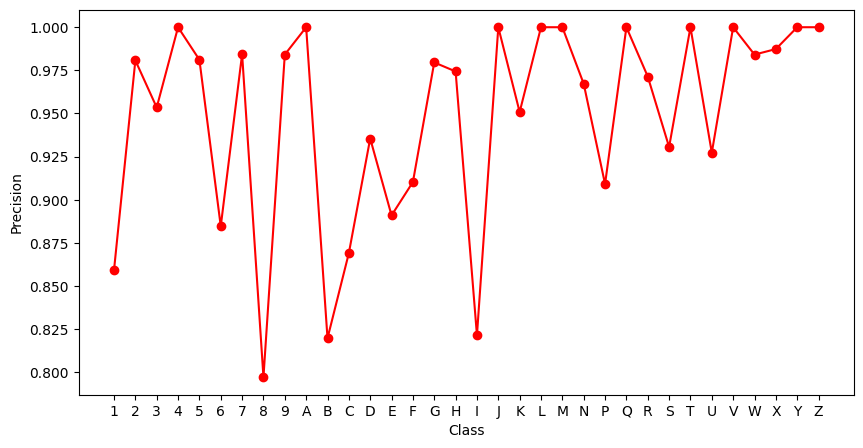

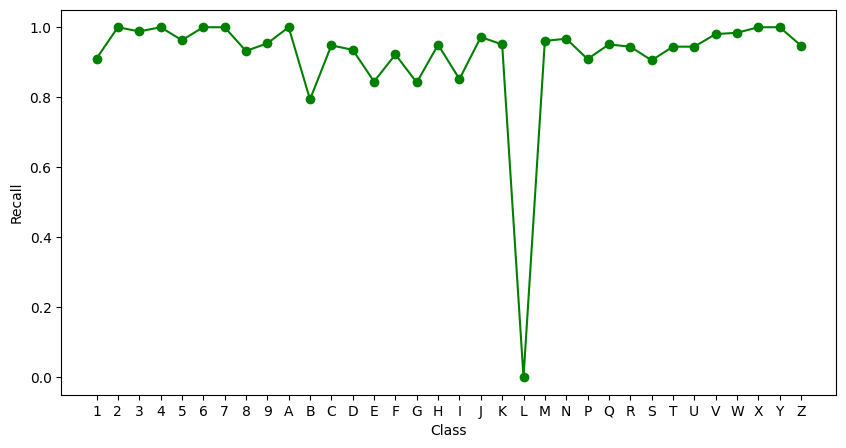

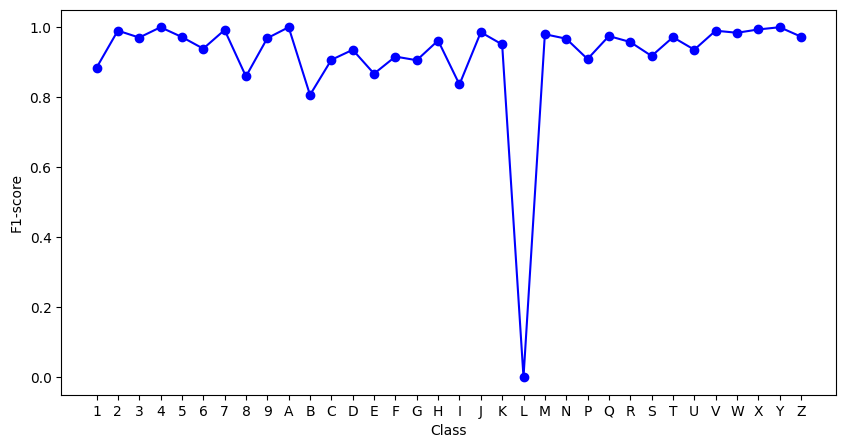

In [169]:
# plot accuracy for each class
df = pd.DataFrame(test_score).transpose()       # convert the dictionary to a dataframe
print(df[-3:])
df = df[:-3]                                    # remove accuracy, macro avg, weighted avg
df['class'] = df.index                          # add a column for class name
# convert class number to character
df['class'] = df['class'].apply(lambda x: chr(int(float(x))))

plt.figure(figsize = (10, 5))
plt.plot(df['class'], df['precision'], label = 'precision', color = 'red', marker = 'o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.show()
plt.figure(figsize = (10, 5))
plt.plot(df['class'], df['recall'], label = 'recall', color = 'green', marker = 'o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.show()
plt.figure(figsize = (10, 5))
plt.plot(df['class'], df['f1-score'], label = 'f1-score', color = 'blue', marker = 'o')
plt.xlabel('Class')
plt.ylabel('F1-score')
plt.show()

### Hyperparameter Tuning

Grid Search

In [170]:
from sklearn.model_selection import GridSearchCV            # used for hyperparameter tuning

In [171]:
k_range = list(range(1, 11))                # range of k values

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors = k_range)

In [172]:
grid = GridSearchCV(kNearest, param_grid,           # instantiate the grid
                    scoring='accuracy')
grid.fit(X, y)                                      # fit the grid with data

/Users/rohit/.local/share/virtualenvs/OCR-XFjxz9Cn/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

Text(0, 0.5, 'Cross-Validated Accuracy')

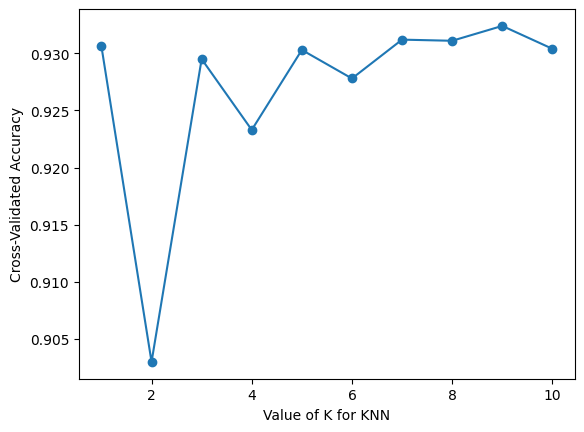

In [173]:
# examine the best model
grid_mean_scores = grid.cv_results_['mean_test_score']

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, grid_mean_scores, marker = 'o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [174]:
print(grid.best_score_)
print(grid.best_params_)

0.9324
{'n_neighbors': 9}


Create New KNN Model With Best Parameters

In [175]:
# create the KNN classifier
kNearest = KNeighborsClassifier(n_neighbors = grid.best_params_['n_neighbors'])
# train the model
kNearest.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

Print Model Statistics

In [176]:
# classification report
test_score = classification_report(y_test, kNearest.predict(X_test), output_dict=True, zero_division=1)

              precision    recall  f1-score   support
accuracy       0.932000  0.932000  0.932000     0.932
macro avg      0.938844  0.905216  0.905551  2000.000
weighted avg   0.936921  0.932000  0.932374  2000.000


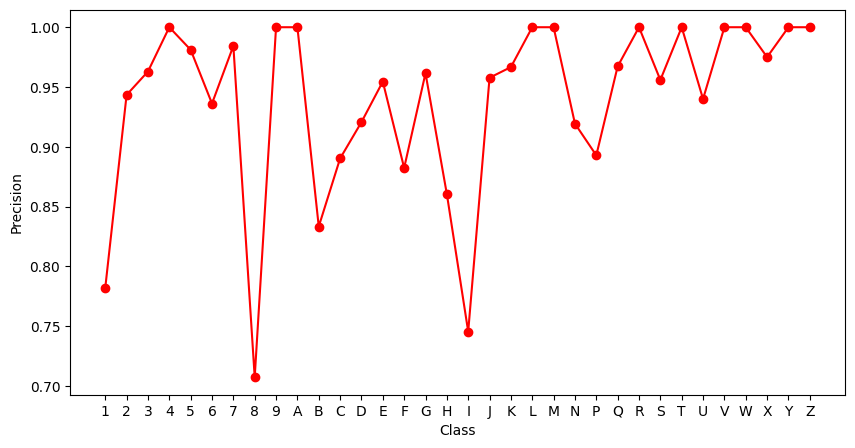

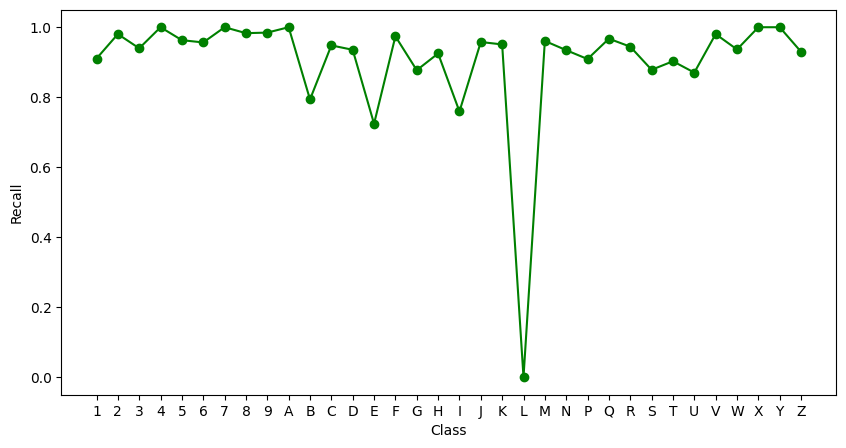

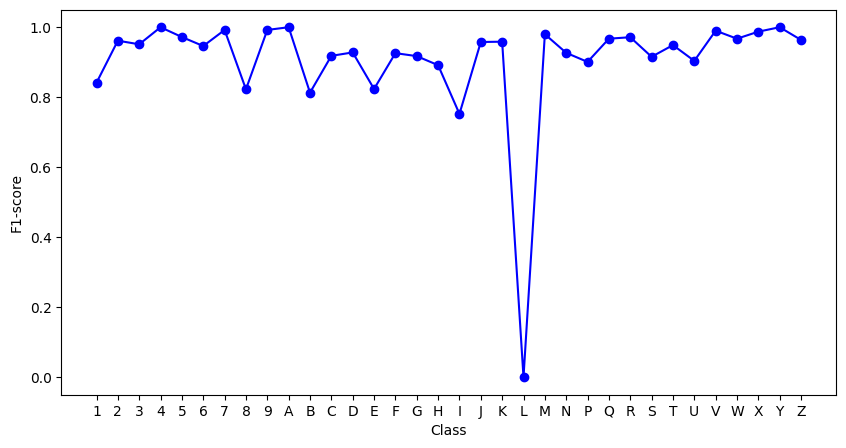

In [177]:
# plot accuracy for each class
df = pd.DataFrame(test_score).transpose()       # convert the dictionary to a dataframe
print(df[-3:])
df = df[:-3]                                    # remove accuracy, macro avg, weighted avg
df['class'] = df.index                          # add a column for class name
# convert class number to character
df['class'] = df['class'].apply(lambda x: chr(int(float(x))))

plt.figure(figsize = (10, 5))
plt.plot(df['class'], df['precision'], label = 'precision', color = 'red', marker = 'o')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.show()
plt.figure(figsize = (10, 5))
plt.plot(df['class'], df['recall'], label = 'recall', color = 'green', marker = 'o')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.show()
plt.figure(figsize = (10, 5))
plt.plot(df['class'], df['f1-score'], label = 'f1-score', color = 'blue', marker = 'o')
plt.xlabel('Class')
plt.ylabel('F1-score')
plt.show()

## TEST MODEL

In [178]:
DATASET = os.listdir(os.getcwd() + '/samples/')    # get the list of images in the samples folder

Select 5 random images from dataset

In [179]:
import random                                  # used for generating random numbers

images = random.sample(DATASET, 5)             # select 5 random images from the dataset
image_list = []                                # create an empty list to store the images

Read all images

In [180]:
for i in images:                               # for each image in the list
    img = cv2.imread(os.getcwd() + '/samples/' + i)     # read the image
    image_list.append(img)                              # append the image to the list

Calculate Height and Width of Image

In [181]:
IMAGE_HEIGHT = image_list[0].shape[0]           # get the height of the image
IMAGE_WIDTH = image_list[0].shape[1]            # get the width of the image
print(IMAGE_HEIGHT, IMAGE_WIDTH)

50 180


Preprocess Image

In [182]:
def preprocess(img):
    # convert to grayscale
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # get binary image
    thresh = cv2.adaptiveThreshold( imgGray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 0)

    # remove noise from image
    close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, np.ones((3, 3), np.uint8))

    # get dilated image
    dilate = cv2.dilate(close, np.ones((2, 2), np.uint8), iterations=1)

    # invert image colors
    image = cv2.bitwise_not(dilate)

    # display image
    plt.imshow(image, cmap='gray')
    plt.show()

    return image

Predict image

In [183]:
def predict(img):
    image = preprocess(img)                  # preprocess the image
    pred = []                                # create an empty list to store the predictions
    for i in range(0, IMAGE_WIDTH, IMAGE_WIDTH//5):
        # get character from captcha
        letter = image[10:IMAGE_HEIGHT-10, i:i+IMAGE_WIDTH//5]
        # resize image to 20x30
        letter = cv2.resize(letter, (RESIZED_IMAGE_WIDTH, RESIZED_IMAGE_HEIGHT))
        # dilate image
        letter = cv2.dilate(letter, np.ones((2, 2), np.uint8), iterations=1)
        # flatten image to 1d numpy array
        letter = letter.reshape((1, RESIZED_IMAGE_WIDTH * RESIZED_IMAGE_HEIGHT))
        letter = np.float32(letter)         # convert to float32
        letter /= 255                       # normalize
        
        # get prediction
        res = kNearest.predict(letter)      # predict the character
        res = chr(int(res[0]))              # convert the result to character
        pred.append(res)                    # append the prediction to the list
    return ''.join(pred)                    # return the prediction as string

Predict all captchas

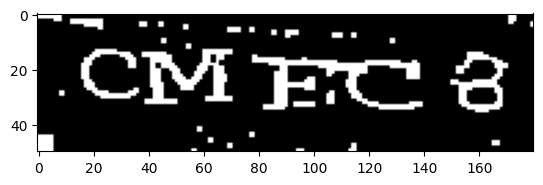

CMPC8
CMEC8.png


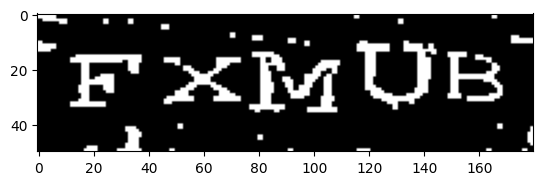

FXMUB
FXMUB.png


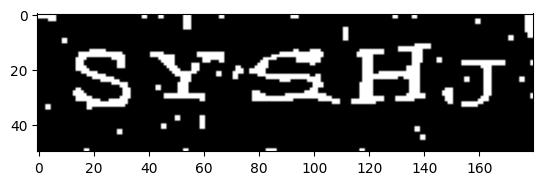

SYSHJ
SYSHJ.png


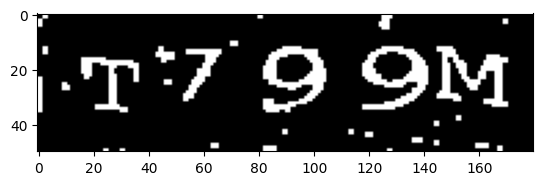

T799M
T799M.png


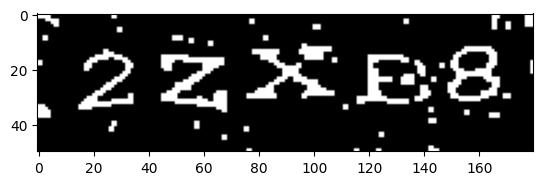

2ZXB8
2ZXB8.png


In [184]:
for i in range(len(image_list)):
    print(predict(image_list[i]))
    print(images[i])